In [33]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [96]:
ds = tfds.load('deep_weeds', batch_size = -1, as_supervised = True)

images, labels = ds['train']

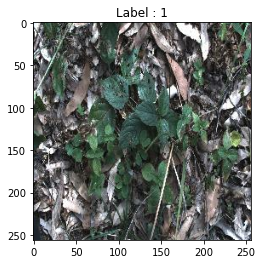

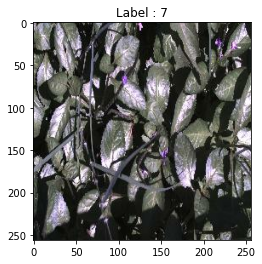

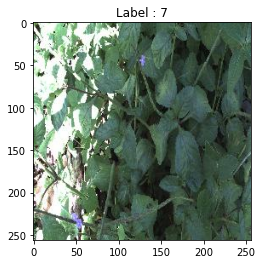

In [132]:
for i in range(3):
    fig , ax = plt.subplots()
    ax.imshow(images[i])
    ax.set_title("Label : " + str(labels[i].numpy()))

# Feature Engineering

Properties of Images which will be extracted and analysed

1. Average RBG values
2. Average Intensity (Convert to greyscale)
3. Compare Histogram
4. Comparing Edge Pictures
5. Apply filters like the gaussian and take average after
6. Comparing Gradient images

# Pre Processing

## Histogram equalization

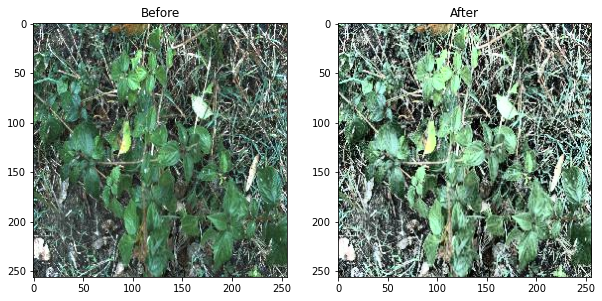

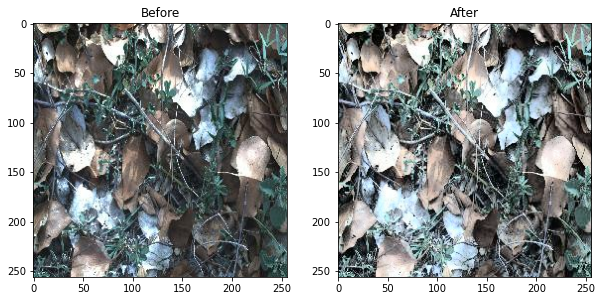

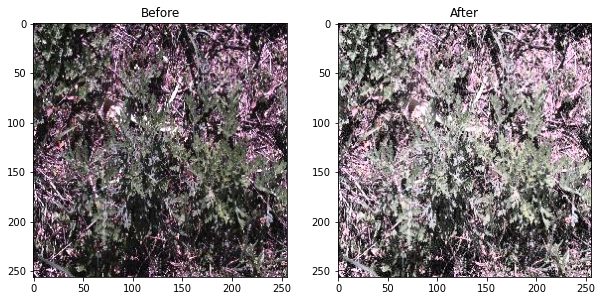

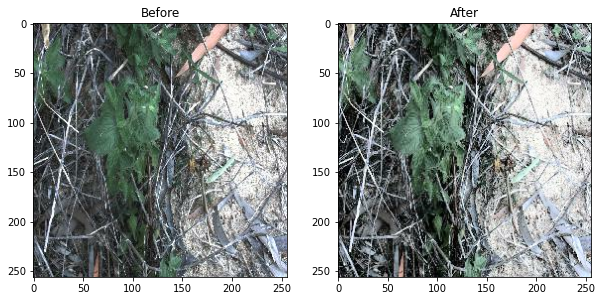

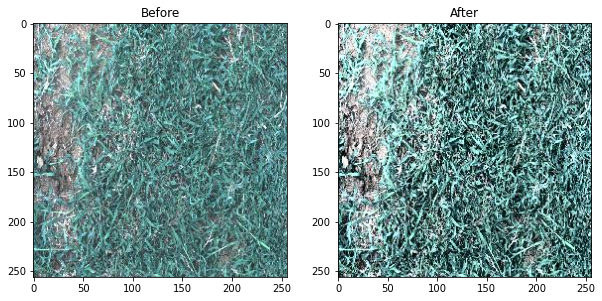

In [161]:
for i in range(5):
    i = np.random.randint(len(images))
    img = images[i].numpy()
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img)
    ax.set_title("Before")

    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

    ax = fig.add_subplot(1,2,2)
    plt.imshow(img_output)
    ax.set_title("After")

## Gaussian Blur

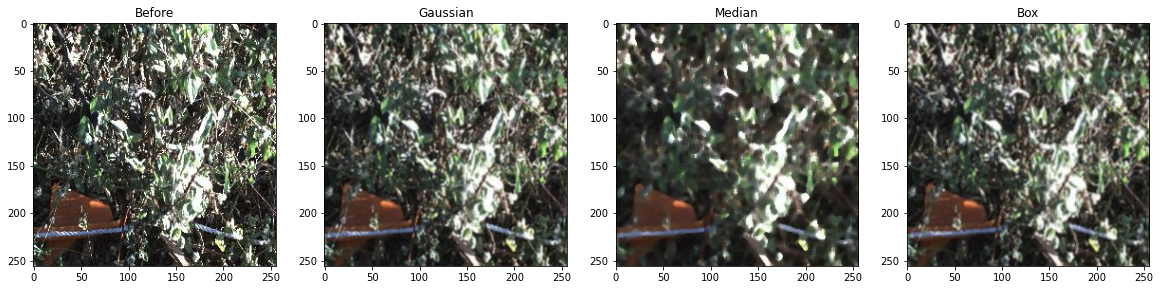

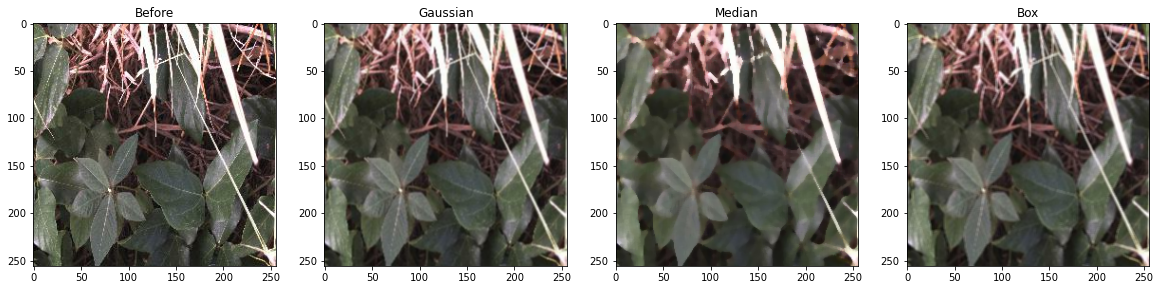

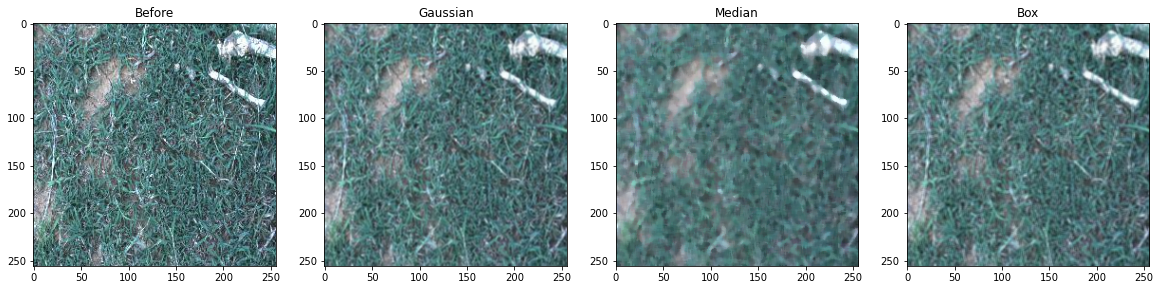

In [182]:
for i in range(3):
    i = np.random.randint(len(images))
    img = images[i].numpy()
    fig = plt.figure(figsize = (20,20))
    ax = fig.add_subplot(1,4,1)
    plt.imshow(img)
    ax.set_title("Before")
    
    gaussian = cv2.GaussianBlur(img, (3,3), 0)
    median = cv2.medianBlur(img,5)
    box = cv2.blur(img , (3,3))
    
    
    ax = fig.add_subplot(1,4,2)
    plt.imshow(gaussian)
    ax.set_title("Gaussian")
    
    ax = fig.add_subplot(1,4,3)
    plt.imshow(median)
    ax.set_title("Median")
    
    ax = fig.add_subplot(1,4,4)
    plt.imshow(box)
    ax.set_title("Box")
